# 1. Data Preparation:

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel('heart_disease.xlsx', sheet_name="Heart_disease")

In [2]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [3]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.exang.value_counts()

exang
False    516
True     337
TURE      36
FALSE     19
Name: count, dtype: int64

In [6]:
# Correcting inconsistent values in the 'exang' column
df['exang'] = df['exang'].replace({'TURE': True, 'FALSE': False})

# Checking unique values again
unique_exang_values = df['exang'].unique()
print("Unique values for exang:", unique_exang_values)

Unique values for exang: [False  True]


# 2. Exploratory Data Analysis (EDA):
### Check for missing values

In [7]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [8]:
# Fill missing values in the 'oldpeak' column with the mean
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

### Check for outliers

<Axes: >

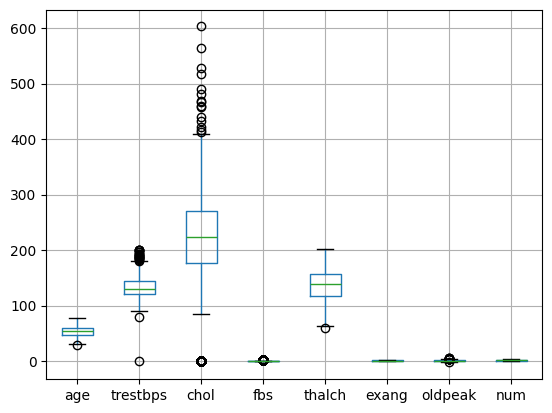

In [10]:
df.boxplot()

### Capping outliers

In [11]:
# writing a function to find upper amd lower extremes
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme

In [12]:
outlier_detection(df,'age')

(29.375, 78.375)

In [13]:
# Writing a function to get lower and upper extremes of all columns

# Defining a function to calculate lower and upper extremes using outlier_detection function
def calculate_extremes(df, colname):
    lower_extreme, upper_extreme = outlier_detection(df, colname)
    return lower_extreme, upper_extreme

# Defining a list of column names for which we want to calculate extremes
columns_to_process = ["age","trestbps","chol","thalch","oldpeak"]

# Initializing an empty dictionary to store column-extreme mappings
columns_dict = {}

# Populating the dictionary with column names and their respective lower/upper extremes
for colname in columns_to_process:
    lower_extreme, upper_extreme = calculate_extremes(df, colname)
    columns_dict[colname] = (lower_extreme, upper_extreme)

# Printing the resulting dictionary
print(columns_dict)

{'age': (29.375, 78.375), 'trestbps': (84.0, 180.0), 'chol': (36.875, 409.875), 'thalch': (61.0, 213.0), 'oldpeak': (-2.25, 3.75)}


In [14]:
# Capping the outliers of all columns with thier respective lower and upper extremes

def cap_outliers(df, colname, lower_extreme, upper_extreme):
    # Cap values above upper extreme
    df.loc[df[colname] > upper_extreme, colname] = upper_extreme
    
    # Cap values below lower extreme
    df.loc[df[colname] < lower_extreme, colname] = lower_extreme

def cap_outliers_in_df(df, columns_dict):
    for colname, (lower_extreme, upper_extreme) in columns_dict.items():
        cap_outliers(df, colname, lower_extreme, upper_extreme)

# Defining a dictionary with column names and their corresponding lower/upper extremes which we got from columns_dict
columns_dict = {
    'age': (20, 78), 'trestbps': (84.0, 180.0), 'chol': (37, 410), 'thalch': (61.0, 213.0),
    'oldpeak': (-2.25, 3.75)
}

# Calling cap_outliers_in_df to cap outliers in all specified columns
cap_outliers_in_df(df, columns_dict)

### Handling duplicate values

In [15]:
df.duplicated().sum()

1

In [16]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [17]:
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
764,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [18]:
df[761:768]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
761,55,Male,asymptomatic,116,186,True,st-t abnormality,102,False,0.000000,flat,fixed defect,2
762,72,Male,asymptomatic,160,213,True,lv hypertrophy,130,False,1.500000,upsloping,normal,2
763,52,Male,asymptomatic,95,37,False,normal,82,True,0.891253,flat,fixed defect,2
764,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.000000,downsloping,normal,2
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.000000,downsloping,normal,2
766,69,Male,asymptomatic,180,236,True,normal,131,True,0.891253,flat,normal,2
767,58,Male,non-anginal,158,232,False,st-t abnormality,138,True,0.891253,downsloping,normal,2


In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df[761:768]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
761,55,Male,asymptomatic,116,186,True,st-t abnormality,102,False,0.000000,flat,fixed defect,2
762,72,Male,asymptomatic,160,213,True,lv hypertrophy,130,False,1.500000,upsloping,normal,2
763,52,Male,asymptomatic,95,37,False,normal,82,True,0.891253,flat,fixed defect,2
764,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.000000,downsloping,normal,2
766,69,Male,asymptomatic,180,236,True,normal,131,True,0.891253,flat,normal,2
767,58,Male,non-anginal,158,232,False,st-t abnormality,138,True,0.891253,downsloping,normal,2
768,60,Male,asymptomatic,180,281,False,st-t abnormality,107,True,0.891253,upsloping,normal,2


In [21]:
df.boxplot()

<Axes: >

### Visualize distribution of features

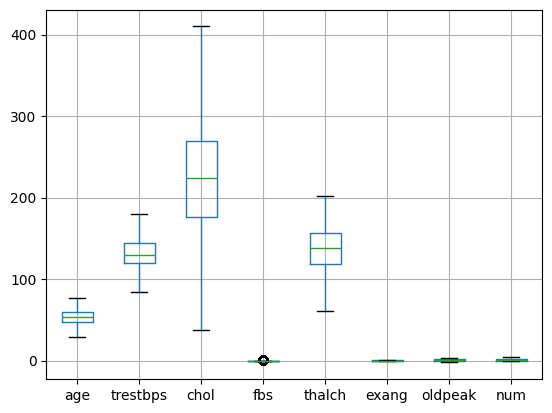

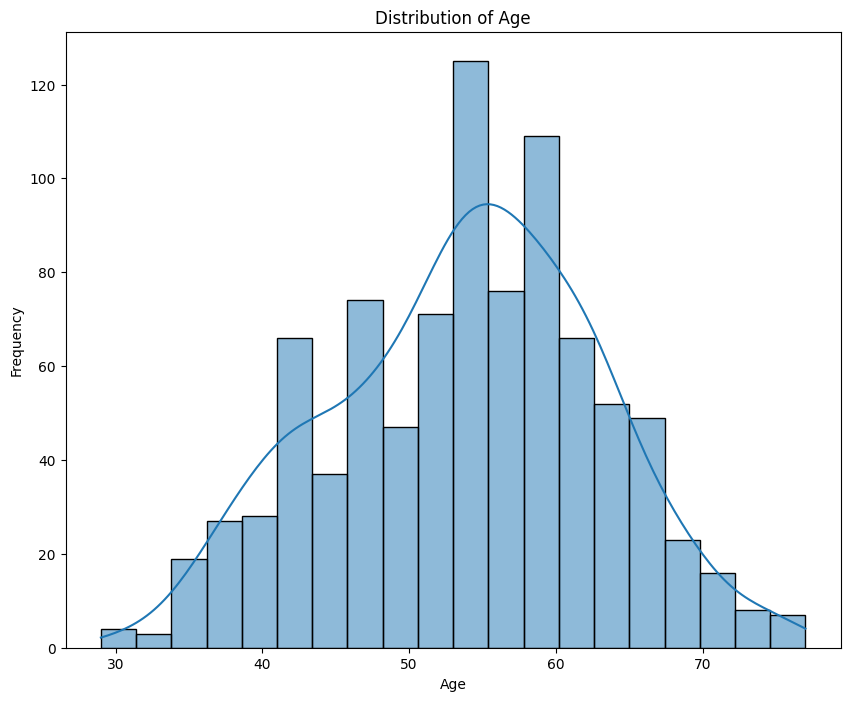

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

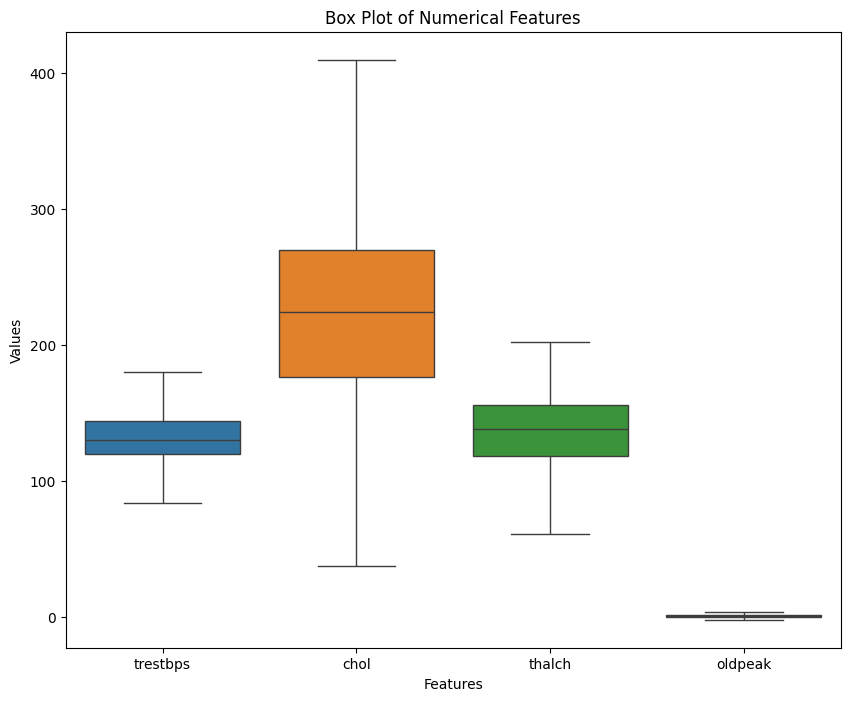

In [23]:
# Box plots
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[['trestbps', 'chol', 'thalch', 'oldpeak']])
plt.title('Box Plot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

### Encoding categorical columns

In [24]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

# Calculate correlation matrix
corr_matrix = df_encoded.corr()

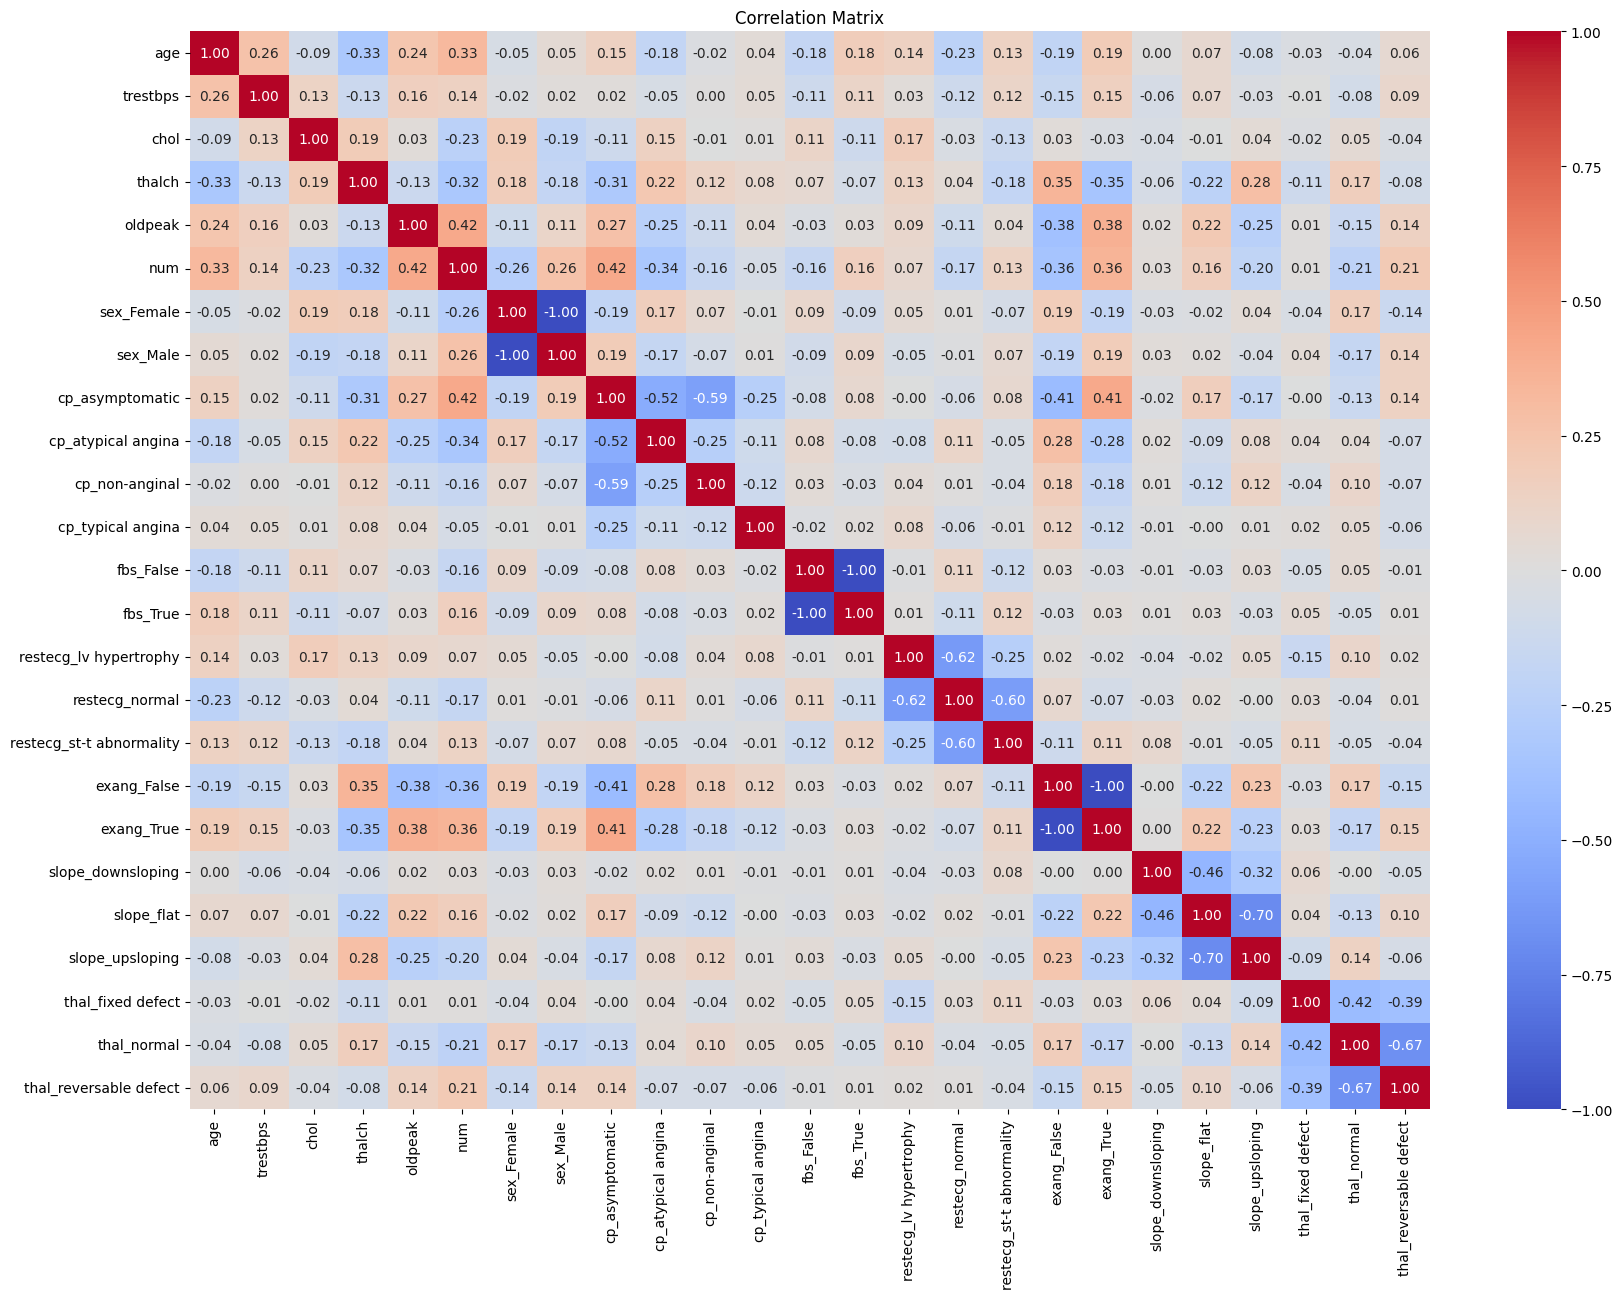

In [25]:
# Plot correlation matrix
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 3. Feature Engineering:

In [26]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

# Handling missing values (if any)
df_encoded.fillna(df_encoded.mean(), inplace=True)  # Fill missing values with mean

In [27]:
df_encoded

,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.300000,0,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False
1,41,135,203,132,0.000000,0,False,True,False,True,...,True,False,True,False,False,True,False,True,False,False
2,57,140,192,148,0.400000,0,False,True,True,False,...,True,False,True,False,False,True,False,True,False,False
3,52,118,186,190,0.000000,0,False,True,False,False,...,False,False,True,False,False,True,False,True,False,False
4,57,110,201,126,1.500000,0,False,True,True,False,...,True,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,37,120,1.500000,4,False,True,True,False,...,True,False,True,False,False,False,True,False,False,True
904,62,166,170,120,3.000000,4,False,True,True,False,...,False,True,False,True,False,True,False,False,False,True
905,56,170,37,123,2.500000,4,False,True,False,False,...,False,False,False,True,True,False,False,False,True,False
906,56,144,208,105,0.891253,4,False,True,False,False,...,False,True,False,True,True,False,False,True,False,False


# 4. Decision Tree Classification:

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split dataset into features and target variable
X = df_encoded.drop(columns=['num'])
y = df_encoded['num']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree Classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.5274725274725275
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        89
           1       0.40      0.47      0.43        47
           2       0.25      0.25      0.25        20
           3       0.14      0.18      0.15        17
           4       0.33      0.11      0.17         9

    accuracy                           0.53       182
   macro avg       0.38      0.35      0.35       182
weighted avg       0.55      0.53      0.53       182



# 5. Hyperparameter Tuning:

In [29]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

best_params

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}

In [30]:
# Retrain the model with best parameters
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_tuned = best_clf.predict(X_test)

# Model evaluation
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Accuracy (Tuned):", accuracy_tuned)
print(classification_report(y_test, y_pred_tuned))

Accuracy (Tuned): 0.554945054945055
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        89
           1       0.40      0.45      0.42        47
           2       0.22      0.20      0.21        20
           3       0.20      0.18      0.19        17
           4       0.50      0.11      0.18         9

    accuracy                           0.55       182
   macro avg       0.42      0.35      0.36       182
weighted avg       0.54      0.55      0.54       182



# 6. Model Evaluation and Analysis:

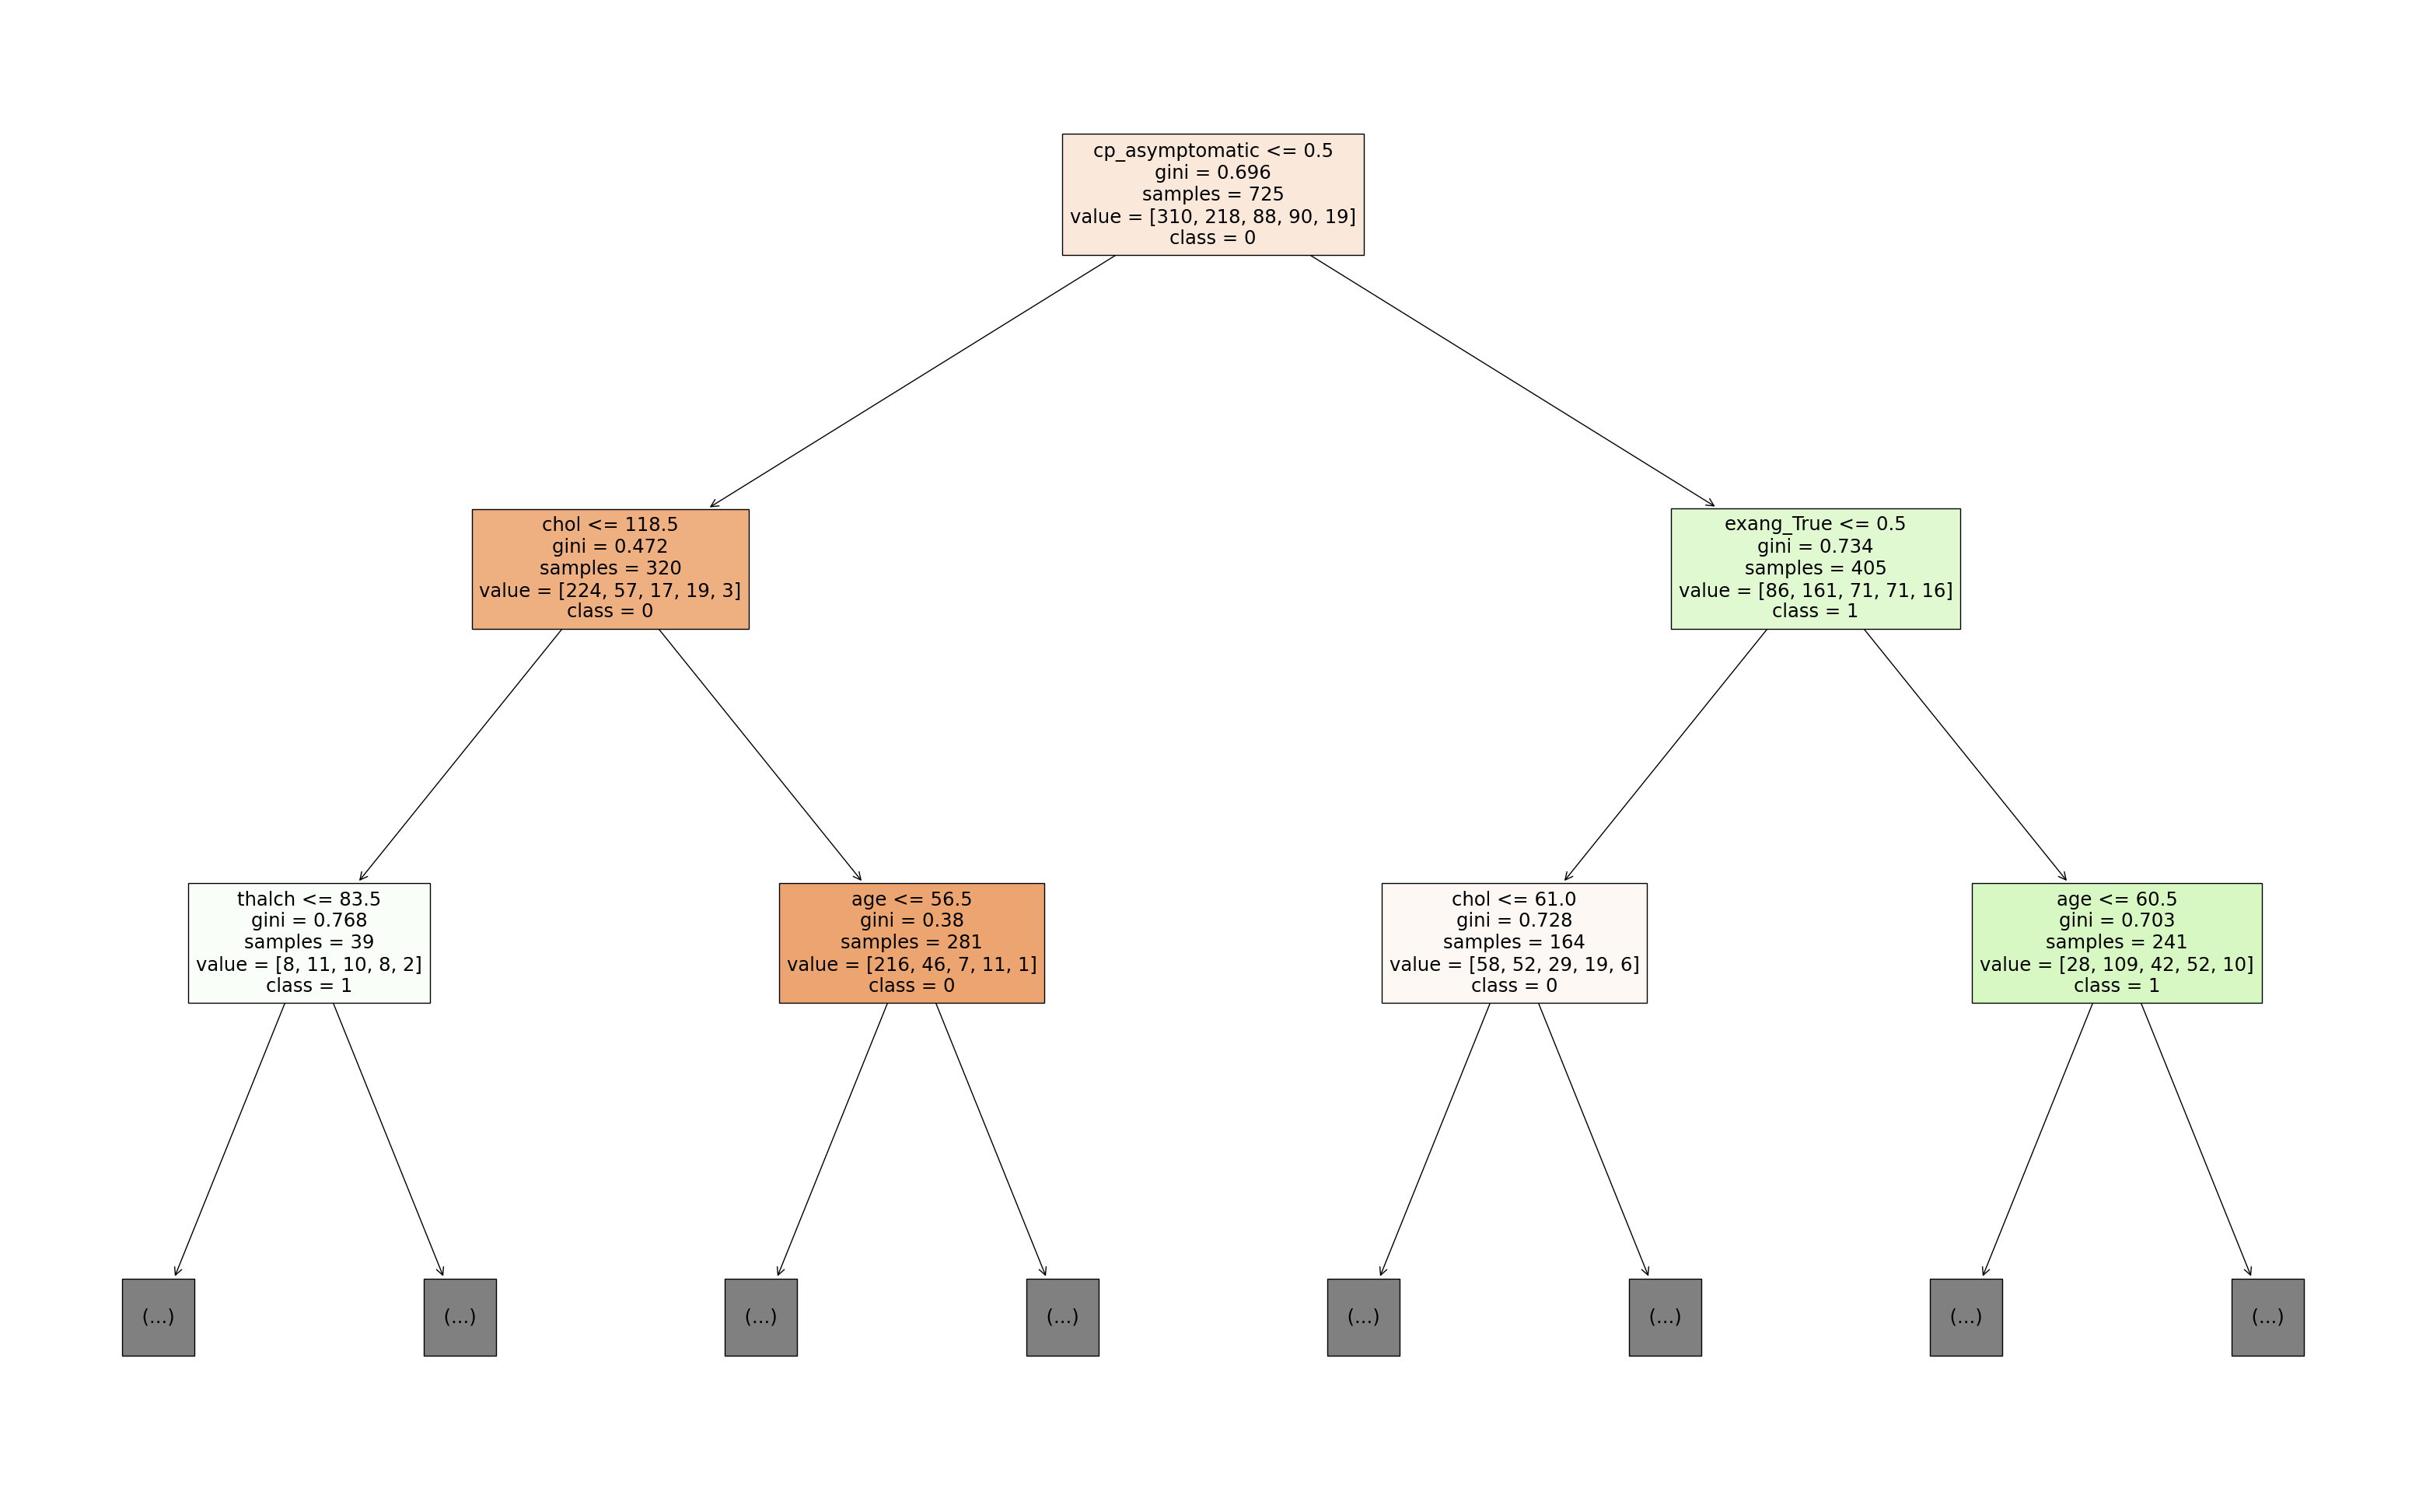

In [31]:
# Visualize the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 25))
plot_tree(best_clf, feature_names=X.columns, class_names=['0', '1', '2', '3', '4'], filled=True, max_depth=2)
plt.show()

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Additional evaluation metrics
precision = precision_score(y_test, y_pred_tuned, average='weighted')
recall = recall_score(y_test, y_pred_tuned, average='weighted')
f1 = f1_score(y_test, y_pred_tuned, average='weighted')
roc_auc = roc_auc_score(y_test, best_clf.predict_proba(X_test), multi_class='ovr')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

Precision: 0.5427354134844014
Recall: 0.554945054945055
F1-score: 0.5419008670581897
ROC AUC: 0.7409961057073079


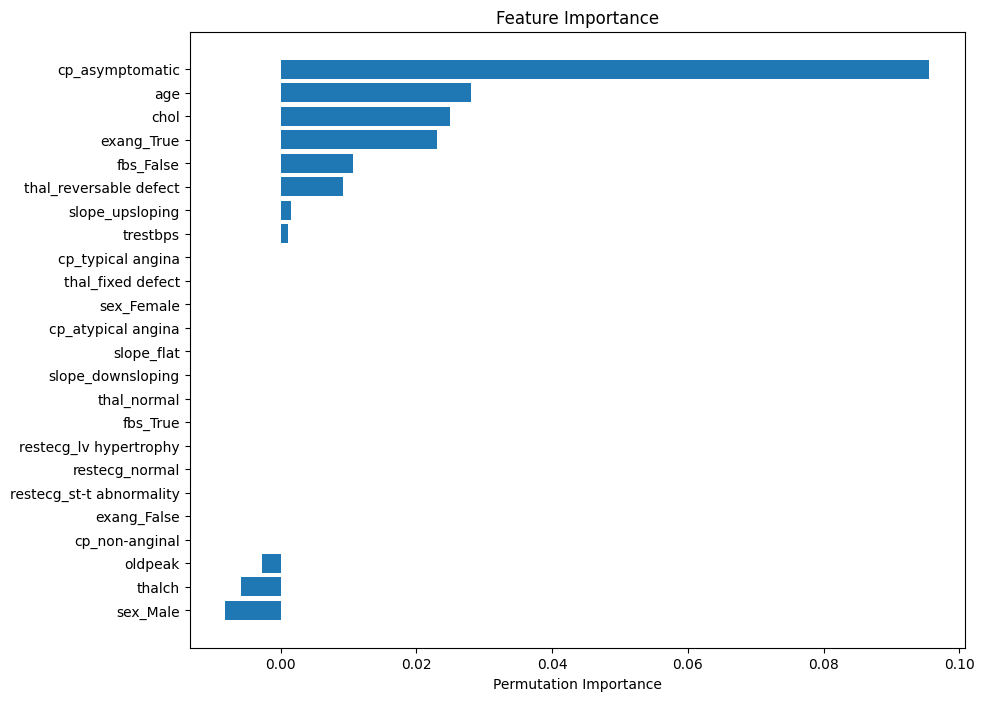

In [33]:
from sklearn.inspection import permutation_importance

# Feature Importance
perm_importance = permutation_importance(best_clf, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()

# Trying Random Forest classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict the response for test dataset using Random Forest classifier
y_pred_rf = rf_clf.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy with Random Forest:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Accuracy with Random Forest: 0.5989010989010989
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        89
           1       0.44      0.62      0.51        47
           2       0.50      0.15      0.23        20
           3       0.33      0.18      0.23        17
           4       0.00      0.00      0.00         9

    accuracy                           0.60       182
   macro avg       0.40      0.35      0.35       182
weighted avg       0.56      0.60      0.56       182



## Hypertuning

In [35]:
rf_clf = RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=10,n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict the response for test dataset using Random Forest classifier
y_pred_rf = rf_clf.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy with Random Forest:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Accuracy with Random Forest: 0.6208791208791209
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        89
           1       0.43      0.64      0.52        47
           2       0.00      0.00      0.00        20
           3       0.67      0.12      0.20        17
           4       0.00      0.00      0.00         9

    accuracy                           0.62       182
   macro avg       0.37      0.33      0.31       182
weighted avg       0.54      0.62      0.55       182



## Model Evaluation and Analysis

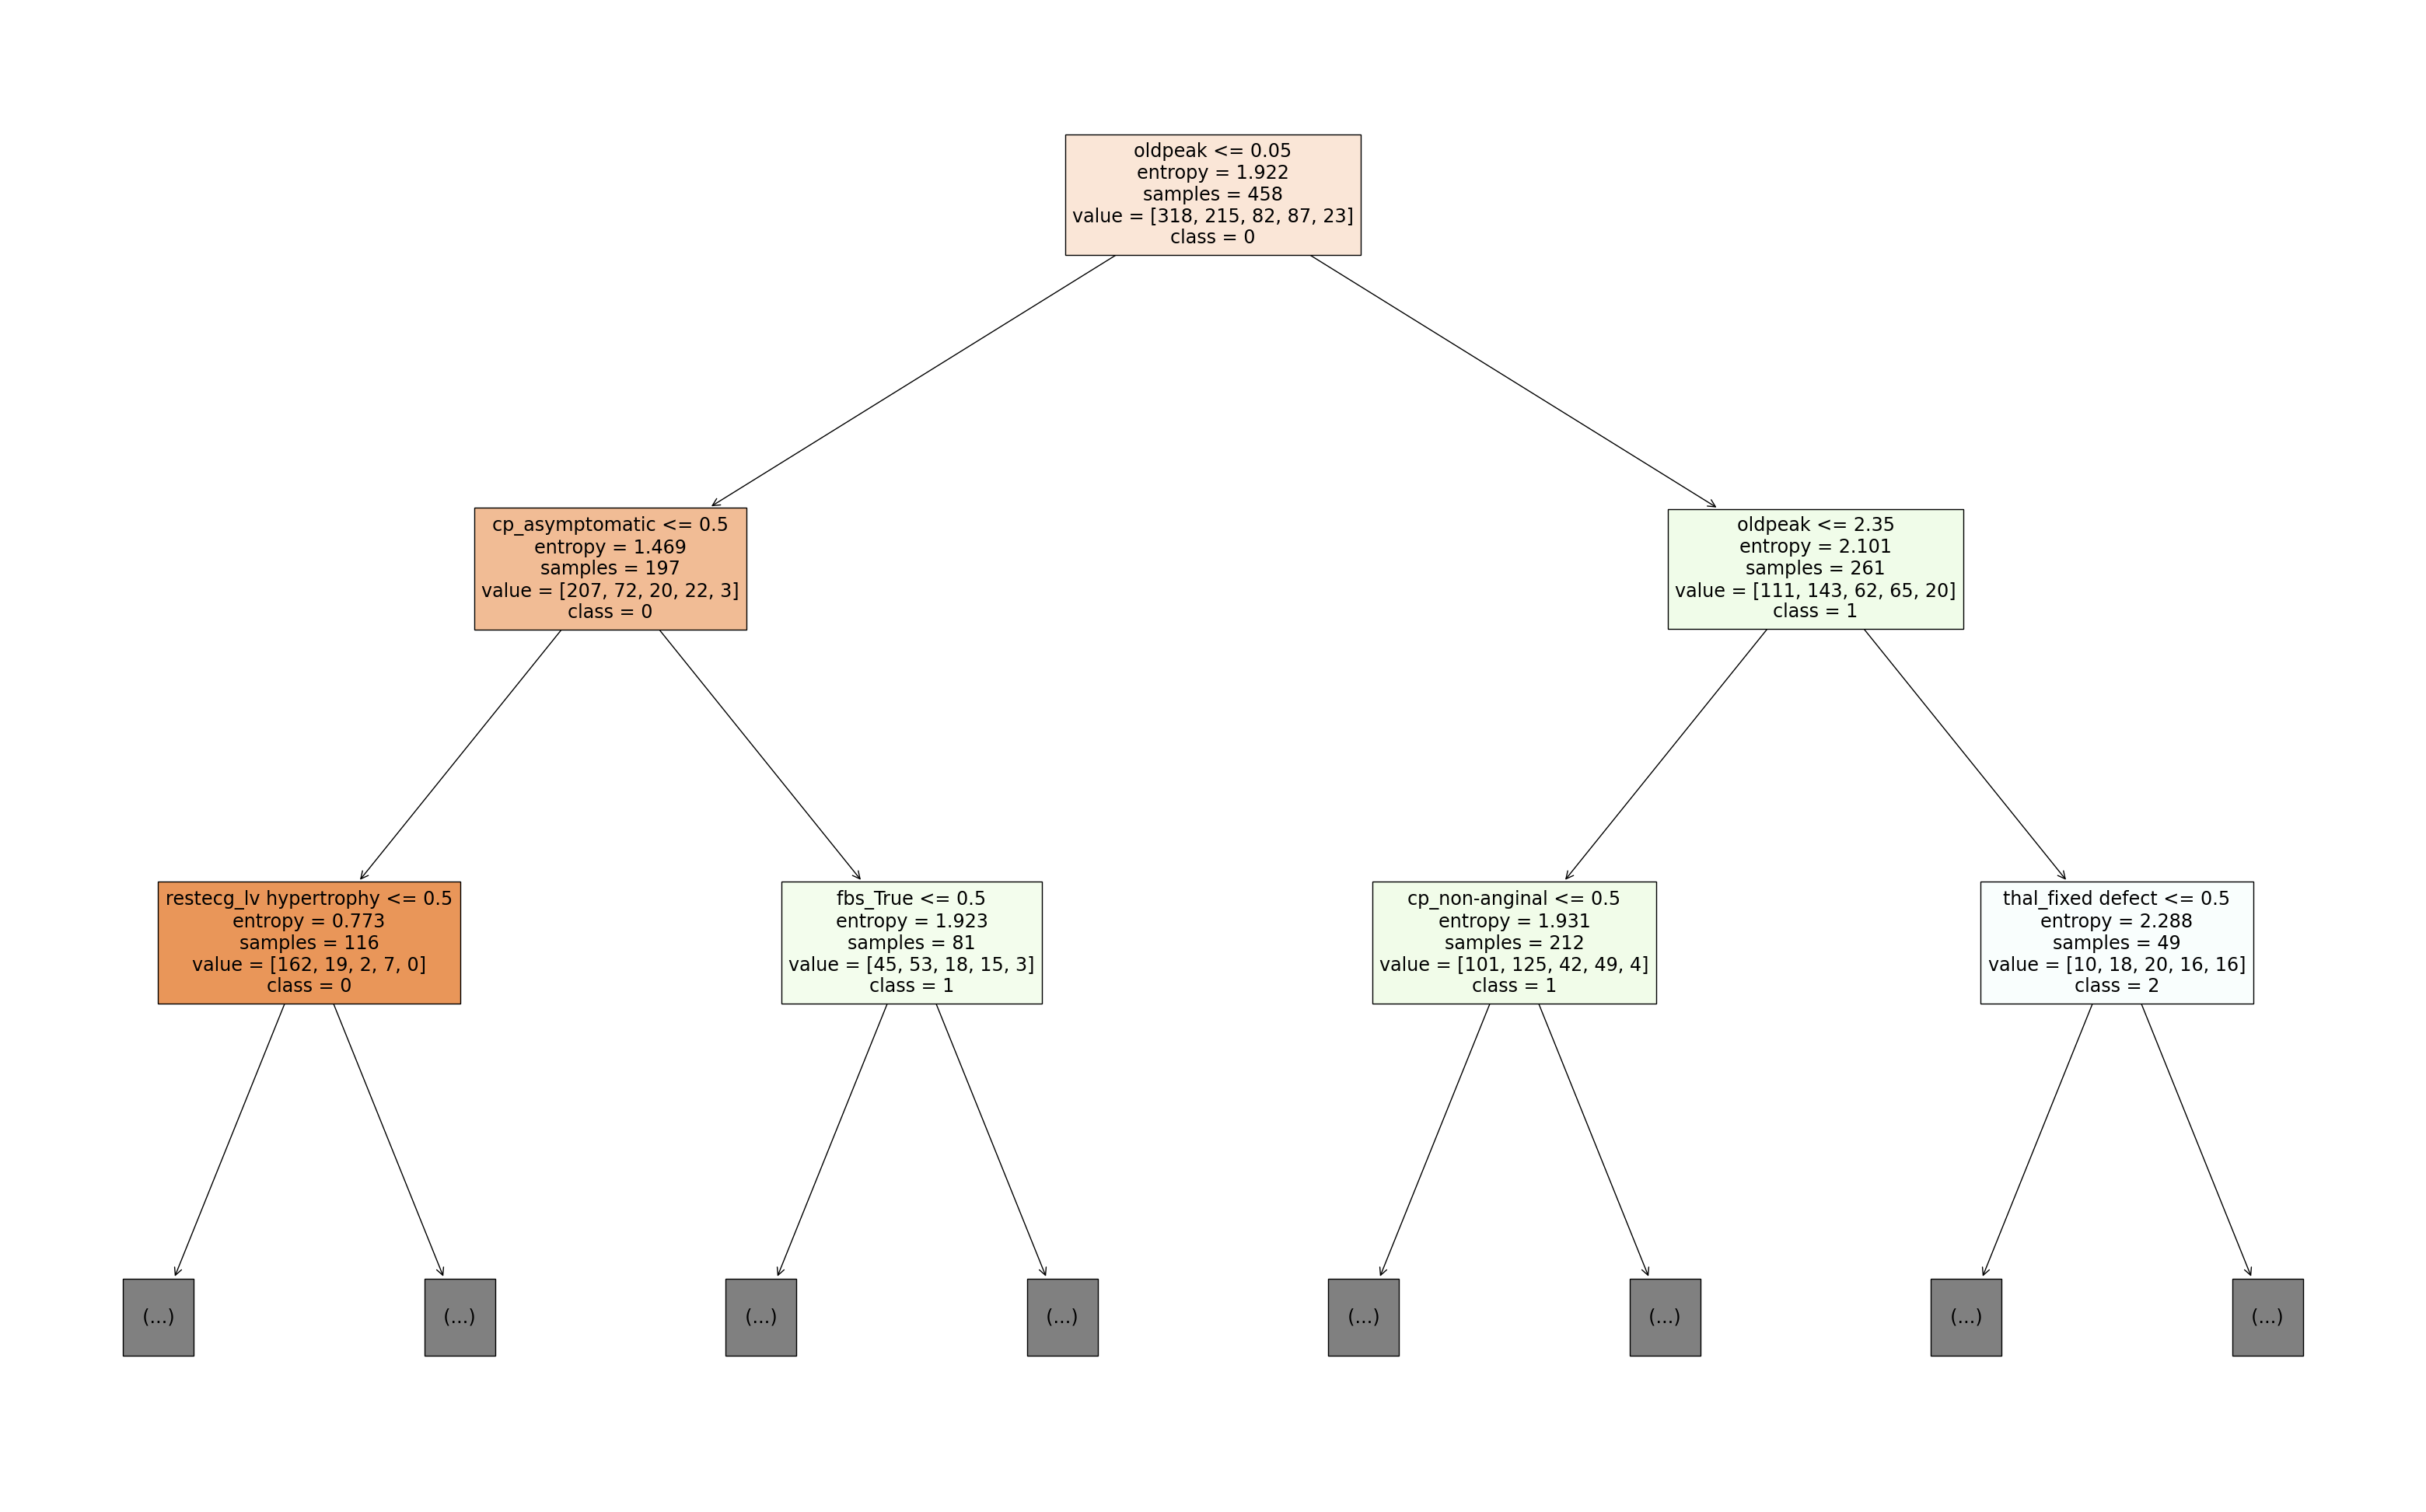

In [36]:
from sklearn.tree import plot_tree

# Choose an estimator from the Random Forest (e.g., the first tree)
estimator = rf_clf.estimators_[0]

# Plot the tree with limited depth and larger size
plt.figure(figsize=(40, 25))
plot_tree(estimator, feature_names=X.columns, class_names=['0', '1', '2', '3', '4'], filled=True, max_depth=2)
plt.show()

In [37]:
# Additional evaluation metrics
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')
roc_auc = roc_auc_score(y_test, best_clf.predict_proba(X_test), multi_class='ovr')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

Precision: 0.5379435748402641
Recall: 0.6208791208791209
F1-score: 0.5523545420097145
ROC AUC: 0.7409961057073079


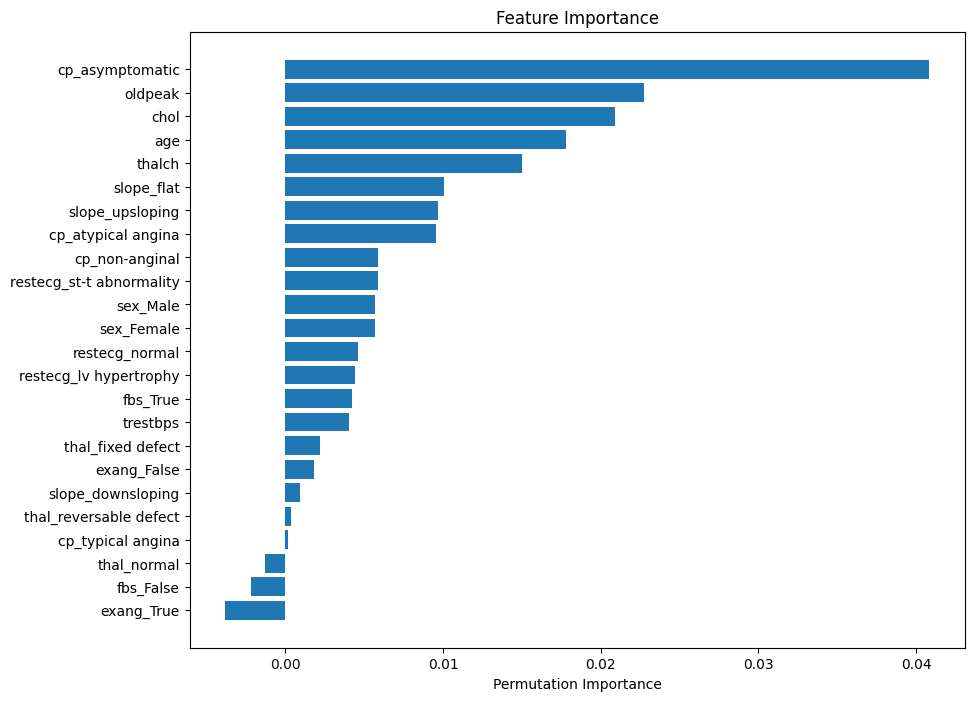

In [38]:
# Feature Importance
perm_importance = permutation_importance(rf_clf, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()

# Trying SMOTE for oversampling

In [39]:
 from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Generating synthetic samples using SMOTE
X_augmented, y_augmented = SMOTE().fit_resample(X, y)

# Train Decision Tree Classifier on augmented training data
clf_augmented = DecisionTreeClassifier()
clf_augmented.fit(X_augmented, y_augmented)

# Predict the response for test dataset using augmented data
y_pred_augmented = clf_augmented.predict(X_test)

# Evaluate accuracy
accuracy_augmented = accuracy_score(y_test, y_pred_augmented)
print("Accuracy with Augmented Data:", accuracy_augmented)
print(classification_report(y_test, y_pred_augmented))

Accuracy with Augmented Data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         9

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



## Hypertuning

In [40]:
clf_augmented = DecisionTreeClassifier(**best_params)
clf_augmented.fit(X_augmented, y_augmented)

# Predict the response for test dataset using augmented data
y_pred_augmented = clf_augmented.predict(X_test)

# Evaluate accuracy
accuracy_augmented = accuracy_score(y_test, y_pred_augmented)
print("Accuracy with Augmented Data:", accuracy_augmented)
print(classification_report(y_test, y_pred_augmented))

Accuracy with Augmented Data: 0.6043956043956044
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        89
           1       0.61      0.30      0.40        47
           2       0.35      0.55      0.43        20
           3       0.40      0.35      0.38        17
           4       0.21      0.33      0.26         9

    accuracy                           0.60       182
   macro avg       0.47      0.48      0.46       182
weighted avg       0.62      0.60      0.59       182



## Model Evaluation and Analysis

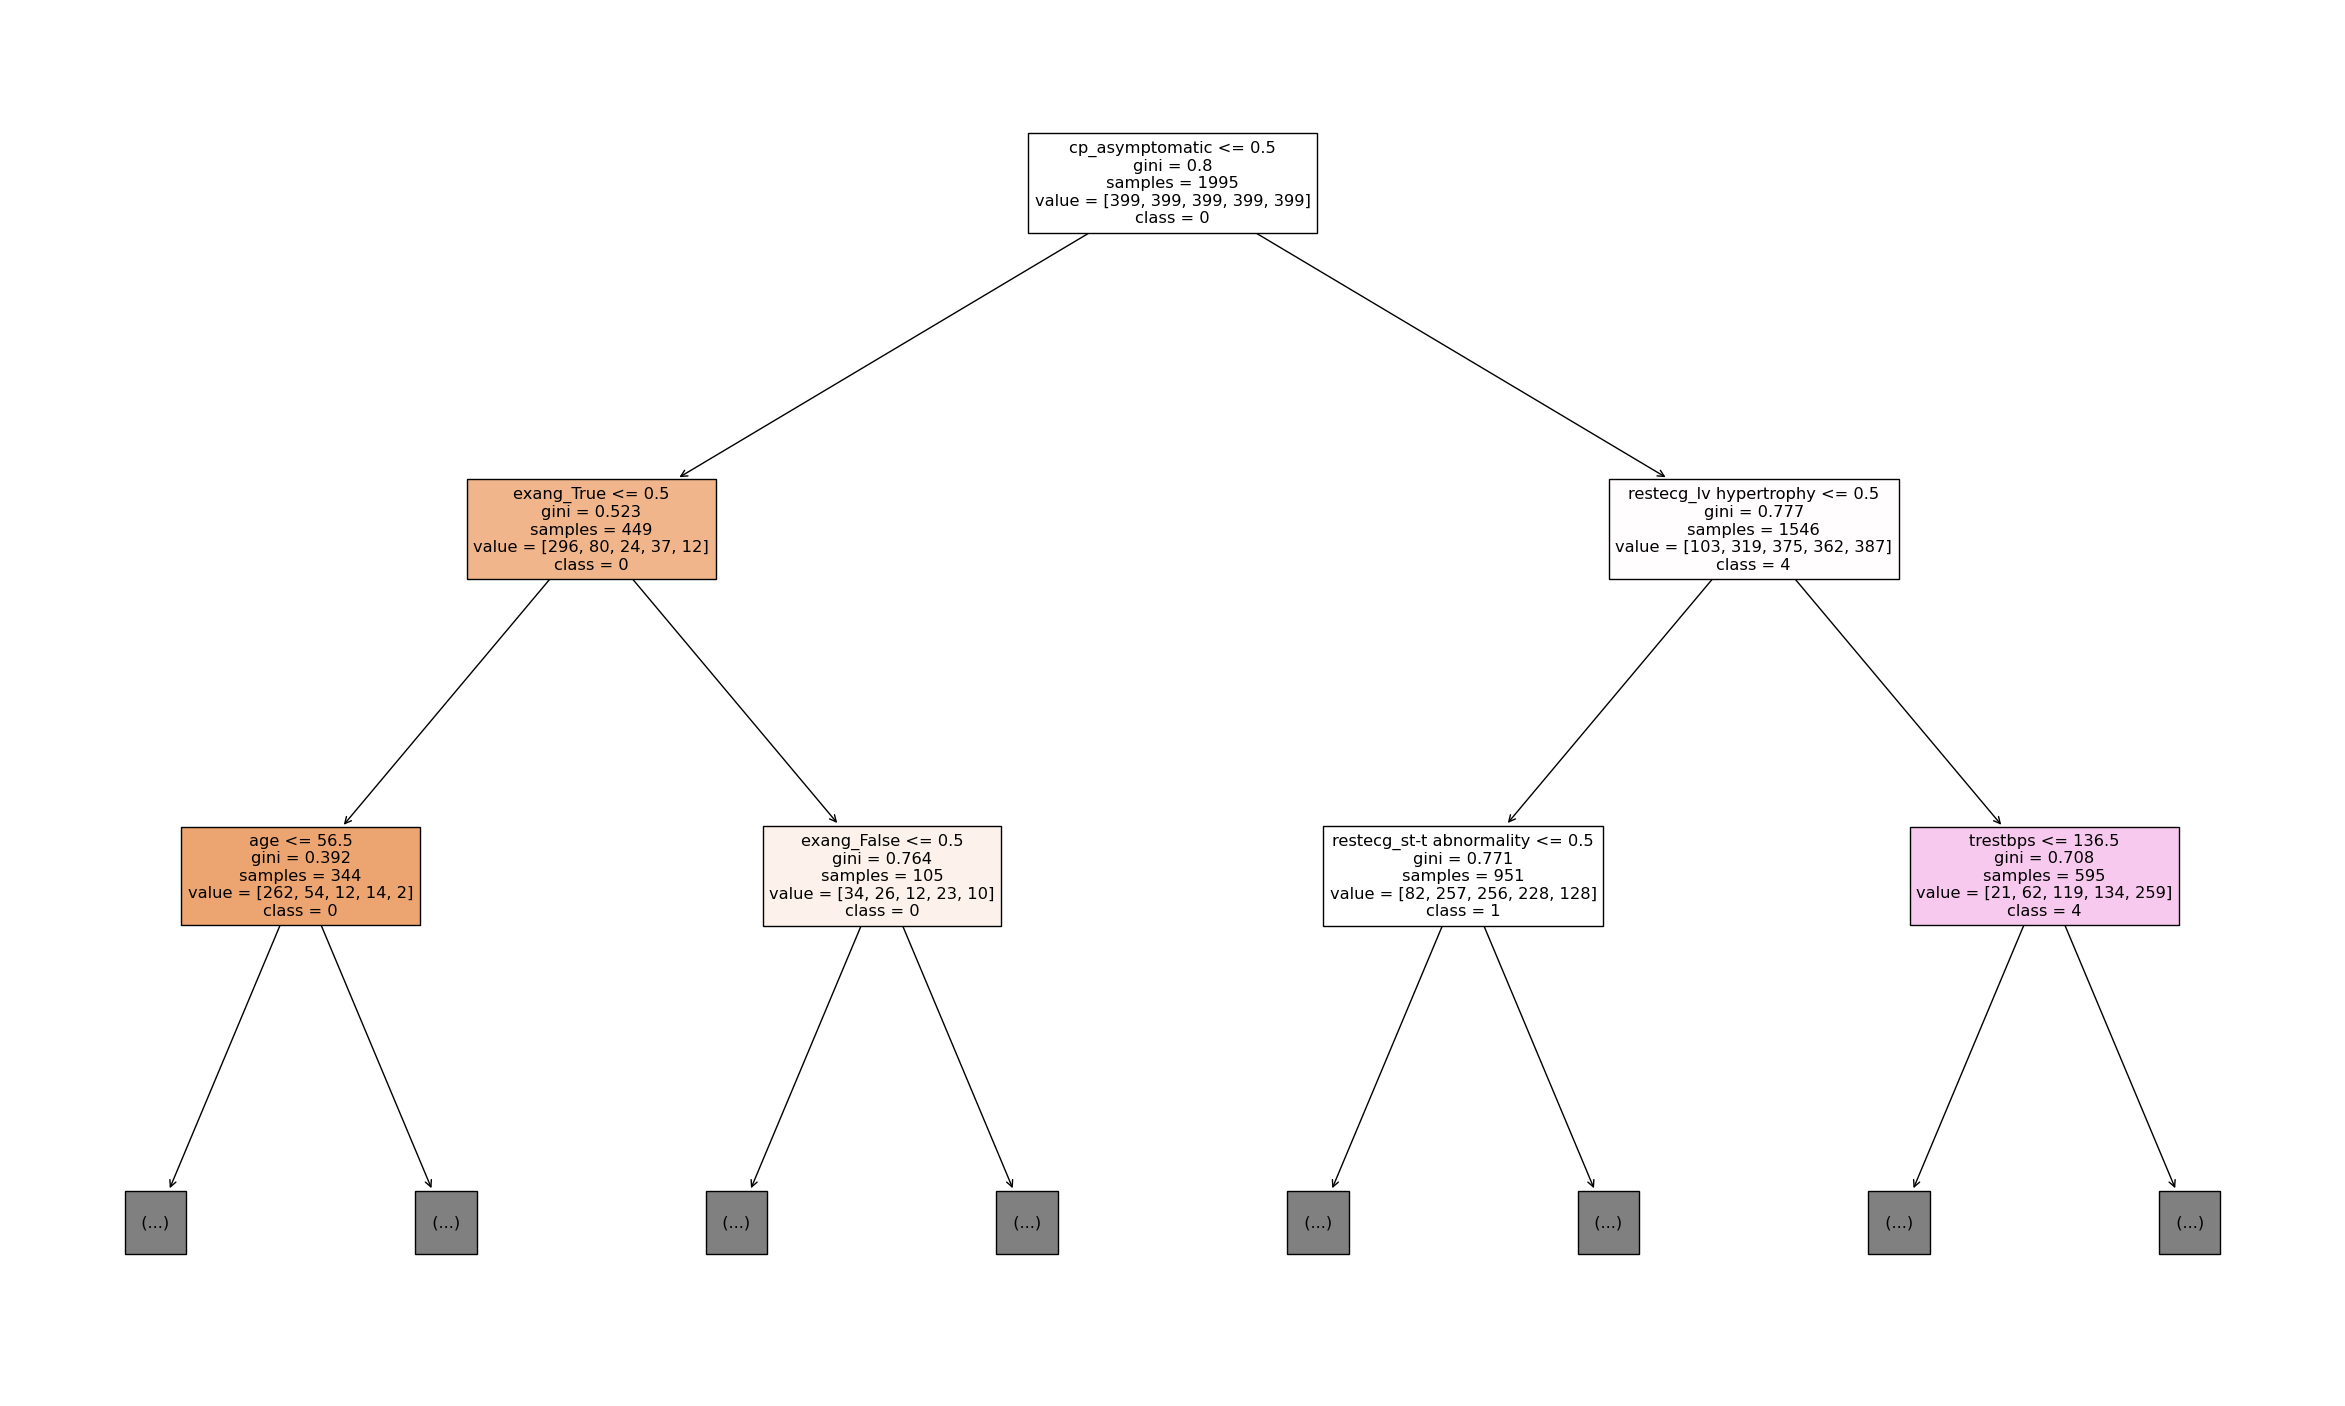

In [41]:
# Visualize the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 18))
plot_tree(clf_augmented, feature_names=X.columns, class_names=['0', '1', '2', '3', '4'], filled=True, max_depth=2)
plt.show()

In [42]:
# Additional evaluation metrics
precision = precision_score(y_test, y_pred_augmented, average='weighted')
recall = recall_score(y_test, y_pred_augmented, average='weighted')
f1 = f1_score(y_test, y_pred_augmented, average='weighted')
roc_auc = roc_auc_score(y_test, best_clf.predict_proba(X_test), multi_class='ovr')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

Precision: 0.6195454593270662
Recall: 0.6043956043956044
F1-score: 0.5939984828343918
ROC AUC: 0.7409961057073079


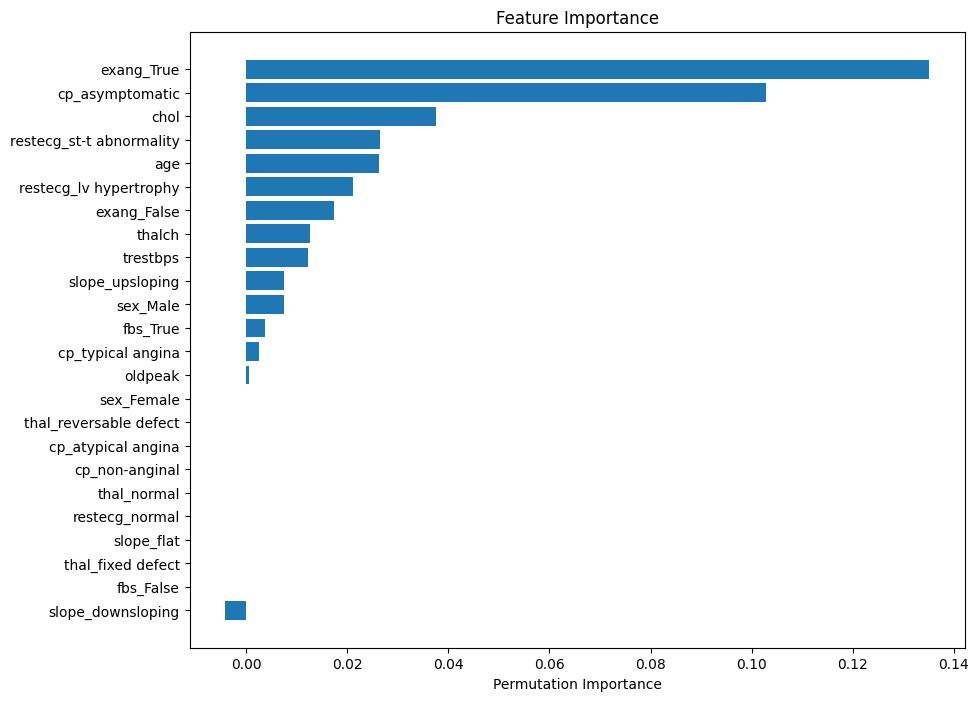

In [43]:
# Feature Importance
perm_importance = permutation_importance(clf_augmented, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()

# Interview Questions:
#### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Common Hyperparameters of Decision Tree Models:

a. Maximum Depth (max_depth): This hyperparameter controls the maximum depth of the decision tree. A deeper tree can capture more complex relationships in the data, but it also increases the risk of overfitting.

b. Minimum Samples Split (min_samples_split): This parameter specifies the minimum number of samples required to split an internal node. Increasing this value can help prevent overfitting by ensuring that a node is only split if it contains enough samples.

c. Minimum Samples Leaf (min_samples_leaf): This hyperparameter sets the minimum number of samples required to be at a leaf node. It helps prevent overfitting by controlling the size of the leaf nodes.

d. Maximum Features (max_features): This parameter determines the maximum number of features to consider when looking for the best split. It can be specified as an integer (number of features) or a float (percentage of features). Limiting the number of features can help reduce overfitting.

e. Criterion: Decision trees use different criteria to measure the quality of a split. Two common criteria are "gini" for the Gini impurity and "entropy" for information gain. The choice of criterion can affect the shape of the tree and its performance.

f. Splitting Strategy: Decision trees can use different strategies for selecting the feature and threshold for each split. For example, "best" strategy chooses the best split based on the chosen criterion, while "random" selects the best split from a random subset of features. The choice of splitting strategy can impact the tree's performance and computational efficiency.

These hyperparameters interact with each other and can significantly affect the performance and behavior of the decision tree model. Tuning these hyperparameters appropriately is essential for achieving the best performance and avoiding overfitting or underfitting.

#### 2. What is the difference between the Label encoding and One-hot encoding?
Difference between Label Encoding and One-hot Encoding:

a. Label Encoding: Label encoding is a method of encoding categorical variables into numerical format. Each category is assigned a unique integer starting from 0. Label encoding is suitable for ordinal categorical variables, where there is a meaningful order among the categories. However, using label encoding for nominal categorical variables (categories with no inherent order) may introduce unintended relationships in the data due to the assigned integer values.

b. One-hot Encoding: One-hot encoding is a method of converting categorical variables into a binary format, where each category is represented by a binary vector. In the one-hot encoding scheme, each category is transformed into a binary vector where only one element is 1 (indicating the presence of that category) and the rest are 0s. One-hot encoding is suitable for nominal categorical variables as it preserves the distinction between categories without imposing any ordinal relationship. However, it can lead to a high-dimensional feature space, especially when dealing with categorical variables with a large number of unique categories.